In [1]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as img
from matplotlib import cm
import matplotlib
import numpy as np
from collections import Counter
from paired_connectivity_analyzer import EEGPairedPermutationAnalyser, DrawEEG
from plotting_utils import plot_compute_sign_differences, draw_edges_by_dict, plot_reproducibility_pattern

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Анализ матриц синхронизации для  состояния с открытыми и закрытыми глазами

Данные: ЭЭГ

Результаты представлены в трёх массивах формата xls, каждый из которых содержит результаты
для независимых групп испытуемых численностью 59 человек. Каждый столбец массивов,
начиная со столбца 2, содержит результаты отдельного испытуемого. Первая строка массива ,
начиная со столбца 2, содержит трехбуквенные идентификаторы испытуемых, чьи результаты
находятся в соответствующем столбце. Первый столбец массива, начиная со строки 2, содержит
записи, указывающие на пару отведений в принятых обозначениях для ЭЭГ отведений системы 10-
20, на номер частотного диапазона (1-δ, 2-θ, 3-α1, 4-α2, 5-β1, 6-β2, 7-γ) и на состояние (fo – покой
с открытыми глазами, fz – покой с закрытыми глазами).


## Разница между состояниями

Оцениваем разницу между состояниями с помощью теста на перемешивание. То есть считаем разницу между состояниями для каждого человека, усредняем по людям, затем путаем состояния, снова считаем разницу, снова усредняем и смотрим сколько раз у нас значение превысило реальное: это и будет оценка p-val. Это процедуру мы можем делать как на полной выборке, так и на подвыборке. У нас задача  - посмотреть насколько паттерны, выявленные по целой выборке совпадают на подвыборке

### Для "конкретного эксперимента" посмотрим значимые пары каналов вместе с доверительными интервалами значений

In [2]:
df = pd.read_csv('eeg_dataframe_nansfilled.csv', index_col=0)
analyzer = EEGPairedPermutationAnalyser(data_df=df, num_perm=1000, thres=0.001)

100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 586.31it/s]


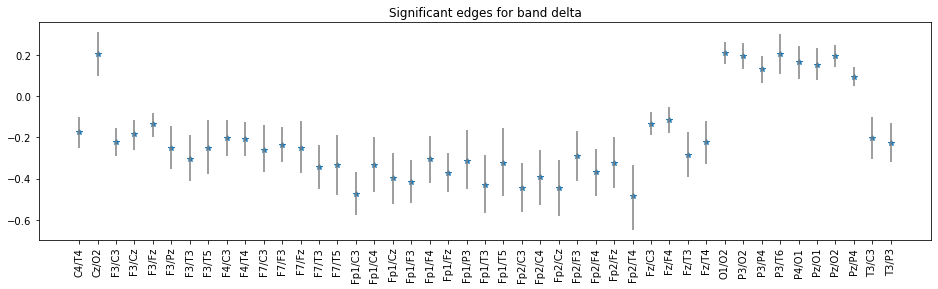

In [30]:
#выберем подгруппу размером size
analyzer.get_subgroup(size=170)
sign_channels = analyzer.bootstrap_significant_channels(band=1,
                                       plot=True, num_btsp=1000, conf_levels=[5, 95])

100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 589.36it/s]


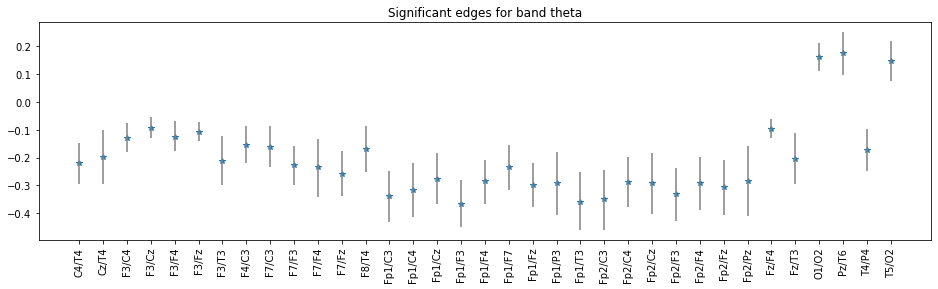

In [31]:
sign_channels = analyzer.bootstrap_significant_channels(band=2,
                                       plot=True, num_btsp=1000, conf_levels=[5, 95])

100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 562.25it/s]


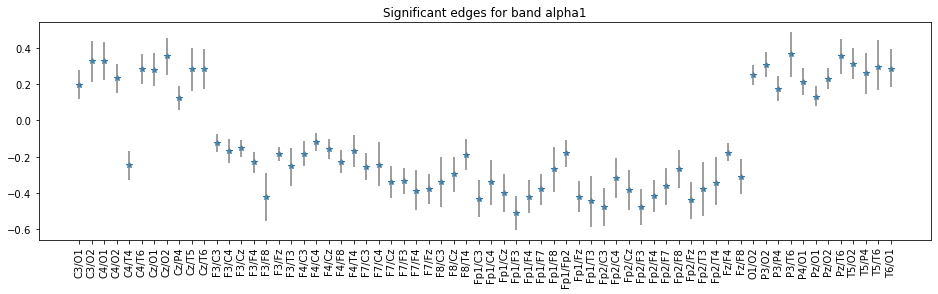

In [32]:
sign_channels = analyzer.bootstrap_significant_channels(band=3,
                                       plot=True, num_btsp=1000, conf_levels=[5, 95])

100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 593.15it/s]


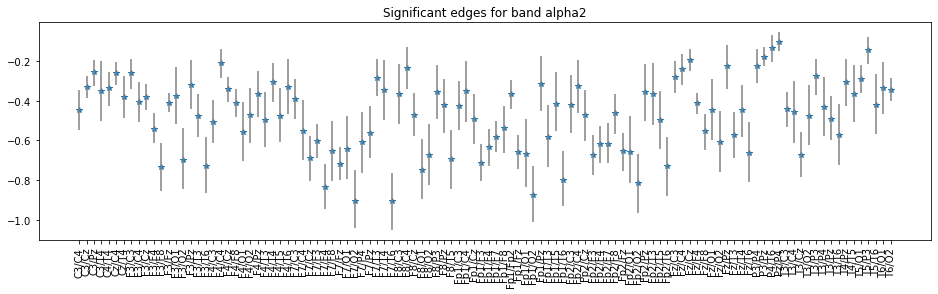

In [33]:
sign_channels = analyzer.bootstrap_significant_channels(band=4,
                                       plot=True, num_btsp=1000, conf_levels=[5, 95])

100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 518.59it/s]


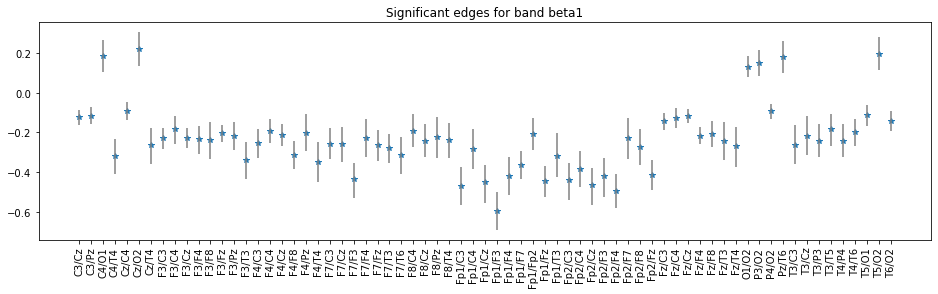

In [34]:
sign_channels = analyzer.bootstrap_significant_channels(band=5,
                                       plot=True, num_btsp=1000, conf_levels=[5, 95])

100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 583.78it/s]


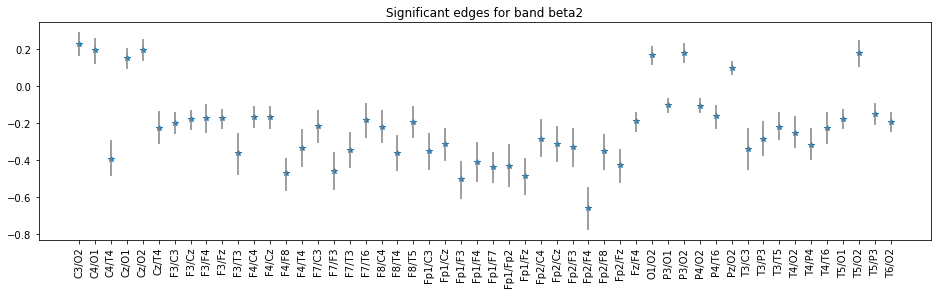

In [35]:
sign_channels = analyzer.bootstrap_significant_channels(band=6,
                                       plot=True, num_btsp=1000, conf_levels=[5, 95])

100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 570.21it/s]


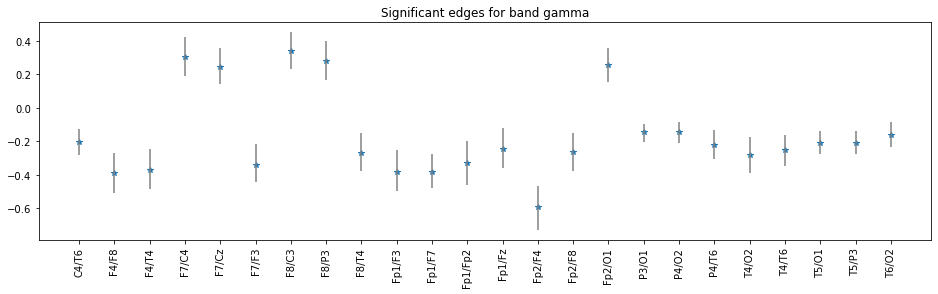

In [36]:
sign_channels = analyzer.bootstrap_significant_channels(band=7,
                                       plot=True, num_btsp=1000, conf_levels=[5, 95])

## Выявление значимых каналов для конкретного эксперимента
Получение с помощью теста на перемешивания значимых пар каналов для конкретного эксперимента, задаем число симуляций и уровень значимости (с поправкой на множественность сравнений)
Посмотрим как будет результат меняться для разного размера выборок, возьмем очень маленький p-value, с самой строгой поправкой на множественные сравнения 0.05/171

При этом при каждом новом запуске результаты будут отличаться!

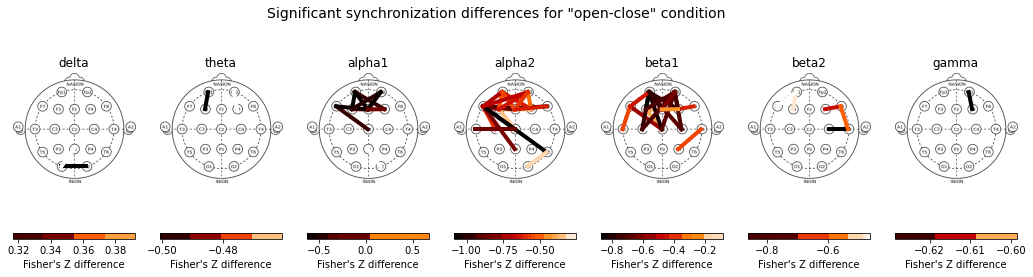

In [44]:
group_size = 30
obj = plot_compute_sign_differences(size=group_size, band=[1,2,3,4,5,6,7], num_perms=10000, thres=0.0003,
                                            title=None, cmap=cm.gist_heat, figsize=(18, 4))

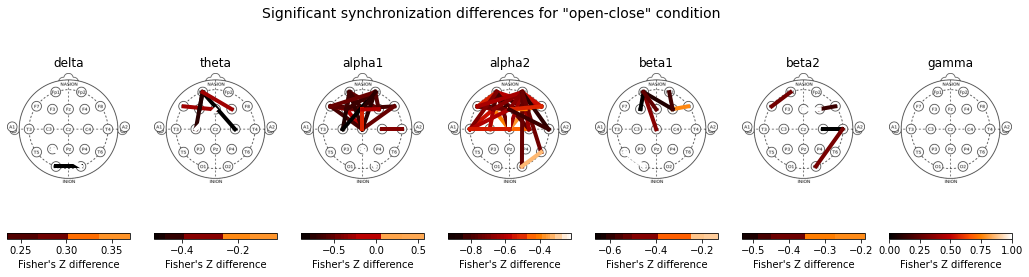

In [45]:
group_size = 40
obj = plot_compute_sign_differences(size=group_size, band=[1,2,3,4,5,6,7], num_perms=10000, thres=0.0003,
                                            title=None, cmap=cm.gist_heat, figsize=(18, 4))

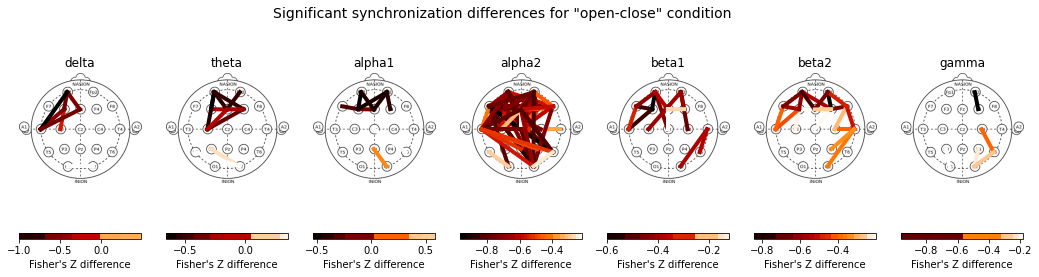

In [46]:
group_size = 50
obj = plot_compute_sign_differences(size=group_size, band=[1,2,3,4,5,6,7], num_perms=10000, thres=0.0003,
                                            title=None, cmap=cm.gist_heat, figsize=(18, 4))

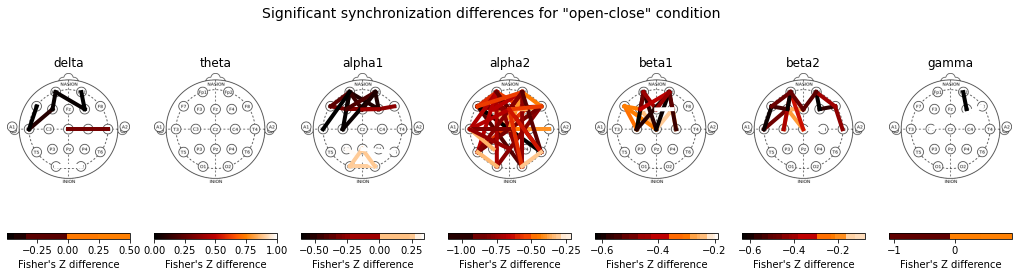

In [47]:
group_size = 60
obj = plot_compute_sign_differences(size=group_size, band=[1,2,3,4,5,6,7], num_perms=10000, thres=0.0003,
                                            title=None, cmap=cm.gist_heat, figsize=(18, 4))

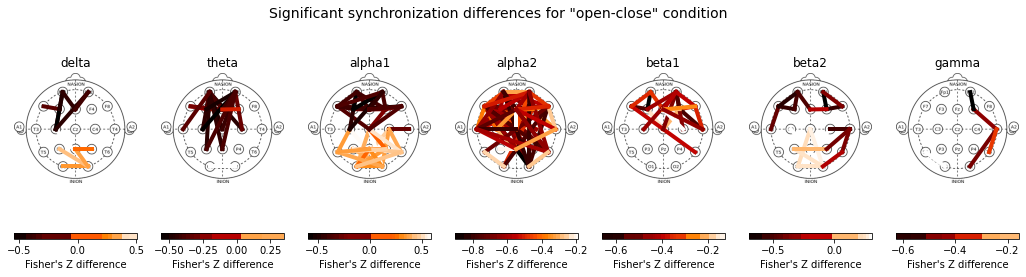

In [48]:
group_size = 70
obj = plot_compute_sign_differences(size=group_size, band=[1,2,3,4,5,6,7], num_perms=10000, thres=0.0003,
                                            title=None, cmap=cm.gist_heat, figsize=(18, 4))

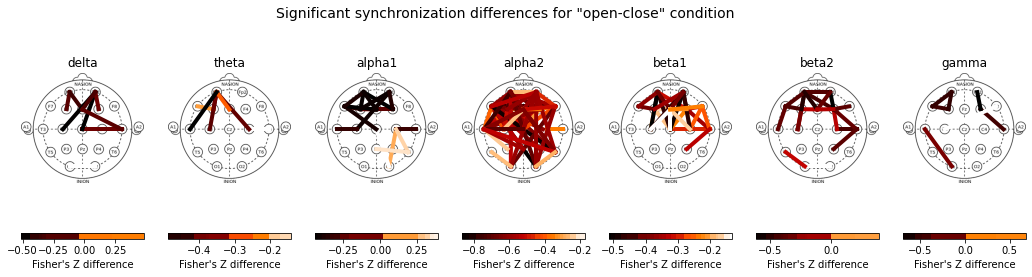

In [49]:
group_size = 80
obj = plot_compute_sign_differences(size=group_size, band=[1,2,3,4,5,6,7], num_perms=10000, thres=0.0003,
                                            title=None, cmap=cm.gist_heat, figsize=(18, 4))

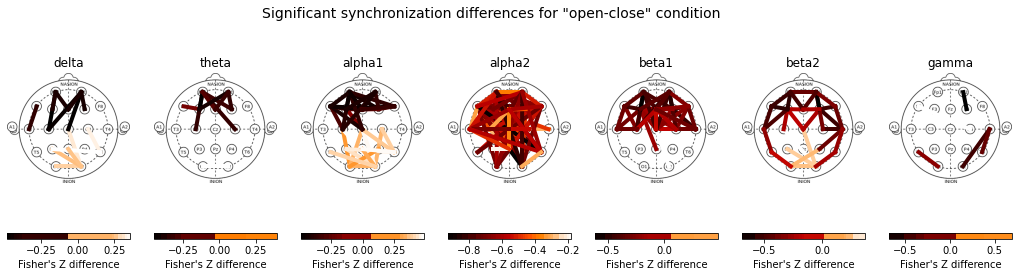

In [36]:
group_size = 100
obj = plot_compute_sign_differences(size=group_size, band=[1,2,3,4,5,6,7], num_perms=10000, thres=0.0003,
                                            title=None, cmap=cm.gist_heat, figsize=(18, 4))

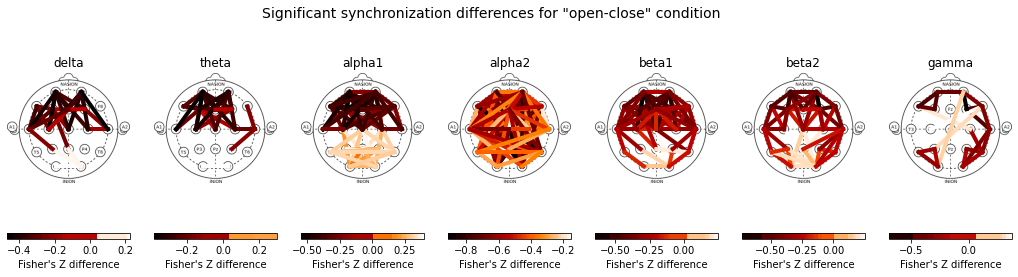

In [52]:
group_size = 177
obj = plot_compute_sign_differences(size=group_size, band=[1,2,3,4,5,6,7], num_perms=10000, thres=0.0003,
                                            title=None, cmap=cm.gist_heat, figsize=(18, 4))

## Воспроизводимость паттерна в группе одного и того же размера

Сейчас посчитаем те же самые значимые разности, но добавим условие воспроизводимости. То есть в добавок к тому что для каждой подвыборки должна быть значимой, она должна появляться не менее чем в какой в скольки то процентах случаях. Эта переменная задаются с помощью доли: factor. При этом порог для уровня значимости предлагается снизить, так как в данном случае мы накладываем дополнительные ограничения и можно ослабить условие на множественные сравнения.

Удивительно, что с ростом числа испытуемых число в

100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.96it/s]


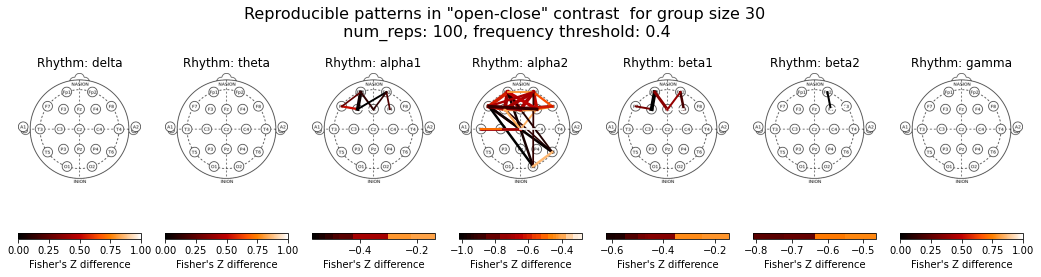

CPU times: user 38.4 s, sys: 1.03 s, total: 39.5 s
Wall time: 39 s


In [57]:
%%time
group_size = 30
obj, pattern = plot_reproducibility_pattern(size=group_size, band=[1,2,3,4,5,6,7], num_perms=1000, num_reps=100, factor=0.4,
                                           thres=0.001, cmap=cm.gist_heat, figsize=(18, 4))

100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 16.11it/s]


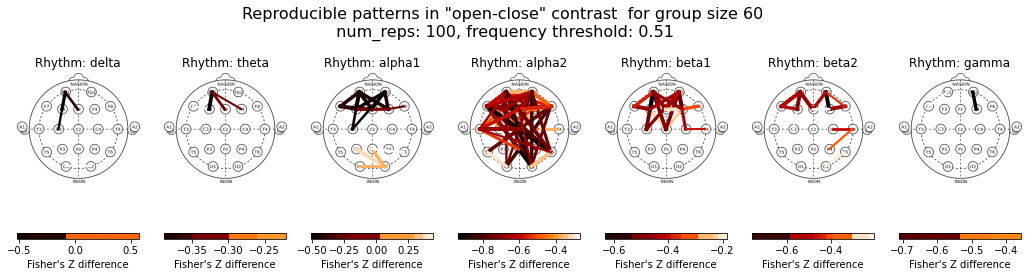

CPU times: user 42.8 s, sys: 1.05 s, total: 43.9 s
Wall time: 43.5 s


In [71]:
%%time
group_size = 60
obj, pattern = plot_reproducibility_pattern(size=group_size, band=[1,2,3,4,5,6,7], num_perms=1000, num_reps=100, factor=0.51,
                                           thres=0.001, cmap=cm.gist_heat, figsize=(18, 4))

In [72]:
#можно сохранить таблички с частотами 
for idx in range(7):
    print(f"Reproducible patterns for {obj.bands[idx]} rhythm")
    display(pd.DataFrame(pattern[idx]).sort_values('frequency', ascending=False))

Reproducible patterns for delta rhythm


,channels,frequency,mean_diff
0,Fp1/F3,0.79,-0.437575
3,Fp1/Fz,0.65,-0.408629
2,Fp1/C3,0.56,-0.488061
1,O1/O2,0.55,0.241595


Reproducible patterns for theta rhythm


,channels,frequency,mean_diff
1,Fp1/F3,0.93,-0.364832
3,Fp1/Fz,0.69,-0.334426
0,F7/F3,0.51,-0.264952
2,Fp1/F4,0.51,-0.336551


Reproducible patterns for alpha1 rhythm


,channels,frequency,mean_diff
4,Fp1/F3,1.00,-0.499395
7,Fp1/Fz,0.91,-0.431381
5,Fp1/F4,0.90,-0.431016
8,Fp2/F3,0.88,-0.462227
2,F7/F3,0.87,-0.352045
9,Fp2/F4,0.86,-0.421291
6,Fp1/F7,0.86,-0.401875
12,P3/O2,0.86,0.326326
3,F7/Fz,0.83,-0.397030
14,F3/Fz,0.81,-0.198653


Reproducible patterns for alpha2 rhythm


,channels,frequency,mean_diff
21,F7/Fz,1.00,-0.704176
18,F7/F3,1.00,-0.599286
41,Fp2/F3,1.00,-0.654650
45,Fp2/Fz,1.00,-0.649608
36,Fp1/Fz,1.00,-0.644383
33,Fp1/F7,1.00,-0.589710
31,Fp1/F3,1.00,-0.715004
1,C3/Cz,1.00,-0.317296
25,F7/T6,1.00,-0.914859
49,Fz/F4,1.00,-0.418578


Reproducible patterns for beta1 rhythm


,channels,frequency,mean_diff
8,Fp1/F3,1.00,-0.579139
16,Fp2/Fz,1.00,-0.399734
15,Fp2/F4,1.00,-0.487554
10,Fp1/Fz,0.99,-0.438327
5,F7/F3,0.99,-0.428181
17,Fz/F4,0.95,-0.228828
6,Fp1/C3,0.95,-0.461334
7,Fp1/Cz,0.93,-0.447484
13,Fp2/Cz,0.91,-0.455290
1,F3/Cz,0.89,-0.231620


Reproducible patterns for beta2 rhythm


,channels,frequency,mean_diff
2,F4/F8,0.97,-0.480713
7,Fp2/F4,0.97,-0.672205
4,Fp1/F3,0.96,-0.509031
5,Fp1/F7,0.96,-0.454163
6,Fp1/Fz,0.95,-0.493940
9,Fp2/Fz,0.83,-0.451190
3,F7/F3,0.81,-0.467370
10,Fz/F4,0.68,-0.217828
0,C4/T4,0.67,-0.445788
12,T6/O2,0.57,-0.237821


Reproducible patterns for gamma rhythm


,channels,frequency,mean_diff
1,Fp2/F4,0.85,-0.617516
0,Fp1/F7,0.56,-0.450469


100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 16.30it/s]


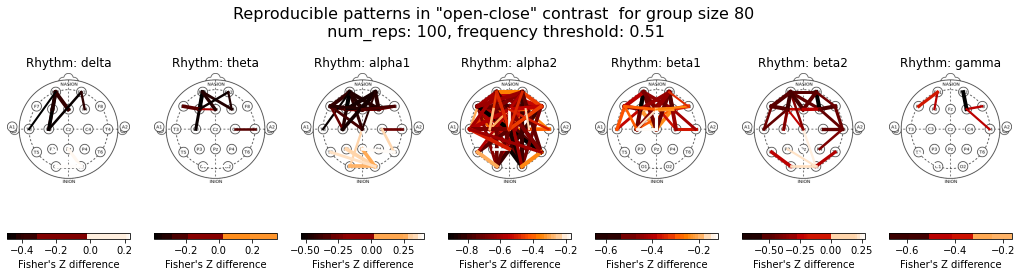

CPU times: user 44.6 s, sys: 1 s, total: 45.6 s
Wall time: 45.2 s


In [73]:
%%time
group_size = 80
obj, pattern = plot_reproducibility_pattern(size=group_size, band=[1,2,3,4,5,6,7], num_perms=1000, num_reps=100, factor=0.51,
                                           thres=0.001, cmap=cm.gist_heat, figsize=(18, 4))

In [74]:
for idx in range(7):
    print(f"Reproducible patterns for {obj.bands[idx]} rhythm")
    display(pd.DataFrame(pattern[idx]).sort_values('frequency', ascending=False))

Reproducible patterns for delta rhythm


,channels,frequency,mean_diff
3,Fp1/Fz,0.98,-0.381327
2,Fp1/F3,0.93,-0.414316
1,Fp1/C3,0.87,-0.468264
7,O1/O2,0.83,0.215463
0,F3/C3,0.77,-0.246212
8,Pz/O2,0.77,0.207647
5,Fp2/C3,0.63,-0.457870
6,Fp2/F4,0.59,-0.394441
9,P3/O2,0.55,0.218649
4,Fp1/T3,0.51,-0.473306


Reproducible patterns for theta rhythm


,channels,frequency,mean_diff
3,Fp1/F3,0.99,-0.371830
7,F7/F3,0.90,-0.240489
5,Fp1/Fz,0.85,-0.319472
2,Fp1/C3,0.76,-0.357429
4,Fp1/F4,0.71,-0.320001
0,C4/T4,0.63,-0.246608
8,Fp2/F3,0.59,-0.352324
6,O1/O2,0.54,0.183015
9,Fp2/F4,0.54,-0.326292
1,F3/Fz,0.51,-0.127193


Reproducible patterns for alpha1 rhythm


,channels,frequency,mean_diff
12,Fp1/Fz,1.00,-0.427005
9,Fp1/F3,1.00,-0.515261
5,F7/F3,0.99,-0.347376
15,Fp2/F4,0.99,-0.413386
10,Fp1/F4,0.99,-0.427593
14,Fp2/F3,0.99,-0.458624
4,F3/Fz,0.97,-0.186953
11,Fp1/F7,0.96,-0.395030
6,F7/Fz,0.96,-0.383581
19,P3/O2,0.95,0.311950


Reproducible patterns for alpha2 rhythm


,channels,frequency,mean_diff
38,Fp1/F4,1.00,-0.625933
49,Fp2/F7,1.00,-0.608896
37,Fp1/F3,1.00,-0.705328
1,C3/Cz,1.00,-0.323702
39,Fp1/F7,1.00,-0.590132
...,...,...,...
68,Fp1/C3,0.60,-0.462778
18,F4/T3,0.60,-0.526217
32,F7/T3,0.60,-0.307073
56,Fz/C3,0.59,-0.301599


Reproducible patterns for beta1 rhythm


,channels,frequency,mean_diff
11,F7/F3,1.00,-0.420950
20,Fp2/C3,1.00,-0.430395
25,Fp2/Fz,1.00,-0.409596
19,Fp1/Fz,1.00,-0.441764
18,Fp1/F7,1.00,-0.365039
24,Fp2/F4,1.00,-0.482650
22,Fp2/Cz,1.00,-0.458210
13,Fp1/C3,1.00,-0.459816
16,Fp1/F3,1.00,-0.584304
15,Fp1/Cz,0.99,-0.446611


Reproducible patterns for beta2 rhythm


,channels,frequency,mean_diff
16,Fp2/F4,1.00,-0.637284
6,F4/F8,1.00,-0.462105
11,Fp1/F3,0.99,-0.488421
7,F7/F3,0.99,-0.440885
15,Fp1/Fz,0.99,-0.469476
13,Fp1/F7,0.99,-0.431381
18,Fp2/Fz,0.96,-0.417653
21,T5/O1,0.86,-0.198151
19,Fz/F4,0.84,-0.208232
1,C4/T4,0.83,-0.410363


Reproducible patterns for gamma rhythm


,channels,frequency,mean_diff
3,Fp2/F4,0.97,-0.587558
2,Fp1/F7,0.78,-0.403623
0,F4/F8,0.60,-0.422111
1,Fp1/F3,0.55,-0.429545
4,F4/T4,0.54,-0.423121
5,T5/O1,0.51,-0.251024


100%|█████████████████████████████████████████| 100/100 [00:07<00:00, 13.75it/s]


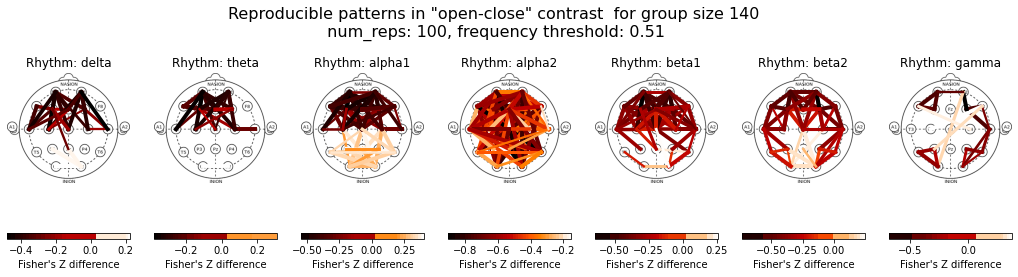

CPU times: user 53.3 s, sys: 1.07 s, total: 54.4 s
Wall time: 54 s


In [75]:
%%time
group_size = 140
obj, pattern = plot_reproducibility_pattern(size=group_size, band=[1,2,3,4,5,6,7], num_perms=1000, num_reps=100, factor=0.51,
                                           thres=0.001, cmap=cm.gist_heat, figsize=(18, 4))

In [77]:
for idx in range(7):
    print(f"Reproducible patterns for {obj.bands[idx]} rhythm")
    display(pd.DataFrame(pattern[idx]).sort_values('frequency', ascending=False))

Reproducible patterns for delta rhythm


,channels,frequency,mean_diff
24,Pz/O2,1.00,0.194842
11,Fp1/F3,1.00,-0.413327
23,P3/O2,1.00,0.197485
22,O1/O2,1.00,0.208065
8,Fp1/C3,1.00,-0.449172
1,F3/C3,1.00,-0.234592
13,Fp1/Fz,1.00,-0.379782
18,Fp2/F4,0.99,-0.361892
15,Fp2/C3,0.99,-0.408597
7,F7/T3,0.98,-0.343129


Reproducible patterns for theta rhythm


,channels,frequency,mean_diff
14,Fp1/Fz,1.00,-0.305282
20,Fp2/F4,1.00,-0.283878
6,F7/F3,1.00,-0.234686
7,F7/Fz,1.00,-0.253603
8,Fp1/C3,1.00,-0.331079
11,Fp1/F3,1.00,-0.364016
12,Fp1/F4,1.00,-0.294204
15,Fp1/T3,1.00,-0.354075
0,C4/T4,0.99,-0.218560
21,Fp2/Fz,0.99,-0.305596


Reproducible patterns for alpha1 rhythm


,channels,frequency,mean_diff
30,Fp1/F4,1.00,-0.424147
18,F4/F8,1.00,-0.232005
38,Fp2/F3,1.00,-0.454519
42,Fp2/Fz,1.00,-0.435062
35,Fp2/C3,1.00,-0.453090
...,...,...,...
0,C3/O1,0.62,0.202892
14,F3/T3,0.59,-0.263046
53,T5/P4,0.58,0.285246
8,Cz/T5,0.57,0.313863


Reproducible patterns for alpha2 rhythm


,channels,frequency,mean_diff
0,C3/C4,1.00,-0.434827
42,F7/T6,1.00,-0.888458
64,Fp2/F3,1.00,-0.638398
63,Fp2/Cz,1.00,-0.447472
61,Fp1/T6,1.00,-0.753529
...,...,...,...
41,F7/T4,0.55,-0.370674
94,T4/T5,0.54,-0.376567
3,C3/T6,0.53,-0.387175
28,F4/T6,0.52,-0.363527


Reproducible patterns for beta1 rhythm


,channels,frequency,mean_diff
0,C3/Cz,1.00,-0.124164
15,F4/T4,1.00,-0.371656
34,Fp2/C4,1.00,-0.386287
33,Fp2/C3,1.00,-0.422742
37,Fp2/F4,1.00,-0.485230
...,...,...,...
49,Pz/T6,0.61,0.207166
60,F8/C4,0.59,-0.198763
59,T5/O1,0.58,-0.134313
8,F3/F8,0.57,-0.250801


Reproducible patterns for beta2 rhythm


,channels,frequency,mean_diff
13,F4/T4,1.00,-0.380031
29,Fp2/F4,1.00,-0.648133
30,Fp2/F8,1.00,-0.350955
23,Fp1/F7,1.00,-0.433883
22,Fp1/F4,1.00,-0.401297
21,Fp1/F3,1.00,-0.494311
31,Fp2/Fz,1.00,-0.423206
18,F8/T4,1.00,-0.377400
32,Fz/F4,1.00,-0.204263
16,F7/T3,1.00,-0.346930


Reproducible patterns for gamma rhythm


,channels,frequency,mean_diff
3,F8/C3,1.00,0.349386
6,Fp1/F7,1.00,-0.389346
7,Fp2/F4,1.00,-0.575056
5,Fp1/F3,0.99,-0.376011
1,F4/T4,0.99,-0.383868
0,F4/F8,0.97,-0.385932
14,T5/O1,0.97,-0.219052
2,F7/F3,0.95,-0.338622
15,T5/P3,0.90,-0.207004
11,P4/T6,0.87,-0.224649


100%|█████████████████████████████████████████| 100/100 [00:08<00:00, 12.24it/s]


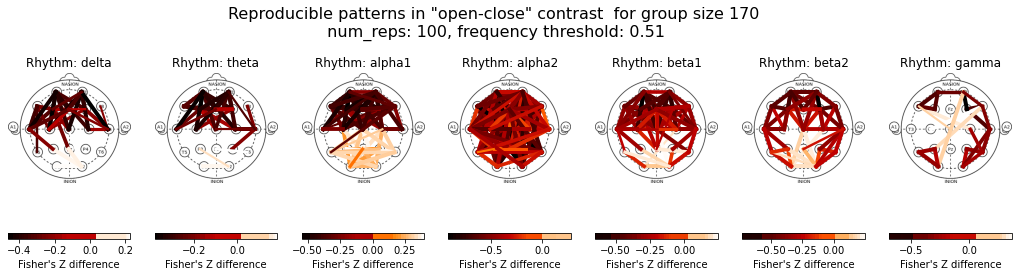

CPU times: user 57.7 s, sys: 1.09 s, total: 58.8 s
Wall time: 58.4 s


In [78]:
%%time
group_size = 170
obj, pattern = plot_reproducibility_pattern(size=group_size, band=[1,2,3,4,5,6,7], num_perms=1000, num_reps=100, factor=0.51,
                                           thres=0.001, cmap=cm.gist_heat, figsize=(18, 4))

In [79]:
for idx in range(7):
    print(f"Reproducible patterns for {obj.bands[idx]} rhythm")
    display(pd.DataFrame(pattern[idx]).sort_values('frequency', ascending=False))

Reproducible patterns for delta rhythm


,channels,frequency,mean_diff
18,Fp1/F4,1.00,-0.321549
30,P3/O2,1.00,0.200086
25,Fp2/Fz,1.00,-0.323005
24,Fp2/F4,1.00,-0.365748
23,Fp2/Cz,1.00,-0.411217
22,Fp2/C4,1.00,-0.393751
21,Fp2/C3,1.00,-0.410245
20,Fp1/T3,1.00,-0.422434
19,Fp1/Fz,1.00,-0.380214
17,Fp1/F3,1.00,-0.413029


Reproducible patterns for theta rhythm


,channels,frequency,mean_diff
0,C4/T4,1.00,-0.223061
14,Fp1/F3,1.00,-0.363873
27,O1/O2,1.00,0.160578
25,Fz/F4,1.00,-0.104613
24,Fp2/Fz,1.00,-0.301249
23,Fp2/F4,1.00,-0.281475
22,Fp2/F3,1.00,-0.315016
20,Fp2/C4,1.00,-0.276172
19,Fp2/C3,1.00,-0.322856
18,Fp1/T3,1.00,-0.351519


Reproducible patterns for alpha1 rhythm


,channels,frequency,mean_diff
33,Fp1/F3,1.00,-0.511102
25,F7/F4,1.00,-0.384332
28,F8/Cz,1.00,-0.281468
56,Pz/O2,1.00,0.235370
30,Fp1/C3,1.00,-0.418531
...,...,...,...
65,Fp1/F8,0.76,-0.285036
47,Fp2/T3,0.73,-0.353976
64,F8/T5,0.59,-0.300432
63,C4/T5,0.55,0.287069


Reproducible patterns for alpha2 rhythm


,channels,frequency,mean_diff
0,C3/C4,1.00,-0.442444
62,Fp1/Fz,1.00,-0.645383
75,Fp2/F8,1.00,-0.457238
74,Fp2/F7,1.00,-0.601969
73,Fp2/F4,1.00,-0.606398
...,...,...,...
79,Fp2/Pz,0.73,-0.333652
46,F8/C4,0.72,-0.234529
65,Fp1/P4,0.53,-0.323018
111,T5/P3,0.53,-0.145074


Reproducible patterns for beta1 rhythm


,channels,frequency,mean_diff
0,C3/Cz,1.00,-0.121773
40,Fp2/C4,1.00,-0.387429
26,F7/T6,1.00,-0.301326
29,F8/T4,1.00,-0.258879
30,Fp1/C3,1.00,-0.451354
...,...,...,...
66,Cz/C4,0.73,-0.099741
65,T3/T5,0.66,-0.181766
69,T3/Cz,0.64,-0.222228
3,C4/O1,0.56,0.185794


Reproducible patterns for beta2 rhythm


,channels,frequency,mean_diff
0,C3/O2,1.00,0.223526
20,F8/T4,1.00,-0.374996
23,Fp1/F3,1.00,-0.495589
24,Fp1/F4,1.00,-0.399356
25,Fp1/F7,1.00,-0.435941
27,Fp1/Fz,1.00,-0.478383
29,Fp2/Cz,1.00,-0.302500
30,Fp2/F3,1.00,-0.317298
31,Fp2/F4,1.00,-0.642741
32,Fp2/F8,1.00,-0.350919


Reproducible patterns for gamma rhythm


,channels,frequency,mean_diff
0,F4/F8,1.00,-0.385809
18,T5/P3,1.00,-0.204892
3,F7/F3,1.00,-0.335879
4,F8/C3,1.00,0.344008
17,T5/O1,1.00,-0.219270
8,Fp1/F7,1.00,-0.388095
14,P4/T6,1.00,-0.220758
10,Fp2/F4,1.00,-0.583681
1,F4/T4,1.00,-0.387938
12,P3/O1,0.99,-0.142667
